In [1]:
import sys, os, decimal, json
sys.path.append(os.path.realpath('..'))
import json, time
import pandas as pd
import matplotlib.pyplot as plt

#from TrainingPipelines.ImageClassifier.ModelBuilder import build_and_train
from ml_botting_core.classification.universal_classifier_trainer import build_and_train

from google.cloud import storage
import os
from pathlib import Path
from dotenv import load_dotenv

env_path = Path(fr"{os.environ['USERPROFILE']}\.env")
load_dotenv(dotenv_path=env_path)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv("Eve_Online_GCP_Creds_File")

import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [2]:
def render_cm(stats, key):
    df_cm = pd.DataFrame(stats[key])
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True, fmt=',d')

def write_rendering(file, rendering_dict):
    json_object = json.dumps(rendering_dict, indent=1)
    with open(file, "w") as outfile:
        outfile.write(json_object)    

def save_to_gcp(source_file, dest_file):
    storage_client = storage.Client()
    bucket = storage_client.get_bucket("eve_online_models") # your bucket name
    blob = bucket.blob(dest_file) 
    blob.upload_from_filename(source_file)
    #blob = bucket.blob('eve_online_models/Eve_Online_Models/test.h5') 
    #blob.upload_from_filename(r"O:\eve_models\training_data\game_state\game_state_model.h5")

3857
Found 3857 files belonging to 3 classes.
Using 3086 files for training.
Found 3857 files belonging to 3 classes.
Using 771 files for validation.
Class Names: ['in_flight', 'in_hanger', 'sub_app']
Epoch 1/10
3086/3086 [==============================] - 17s 4ms/step - loss: 0.2059 - accuracy: 0.9394 - val_loss: 0.0464 - val_accuracy: 0.9922
Epoch 2/10
3086/3086 [==============================] - 11s 3ms/step - loss: 0.0274 - accuracy: 0.9951 - val_loss: 0.0516 - val_accuracy: 0.9948
Epoch 3/10
3086/3086 [==============================] - 11s 3ms/step - loss: 0.0410 - accuracy: 0.9958 - val_loss: 0.0519 - val_accuracy: 0.9935
Epoch 4/10
3086/3086 [==============================] - 11s 4ms/step - loss: 0.0196 - accuracy: 0.9961 - val_loss: 0.0953 - val_accuracy: 0.9922
Epoch 5/10
3086/3086 [==============================] - 11s 4ms/step - loss: 0.0213 - accuracy: 0.9964 - val_loss: 0.1324 - val_accuracy: 0.9909
Epoch 6/10
3086/3086 [==============================] - 11s 4ms/step - los

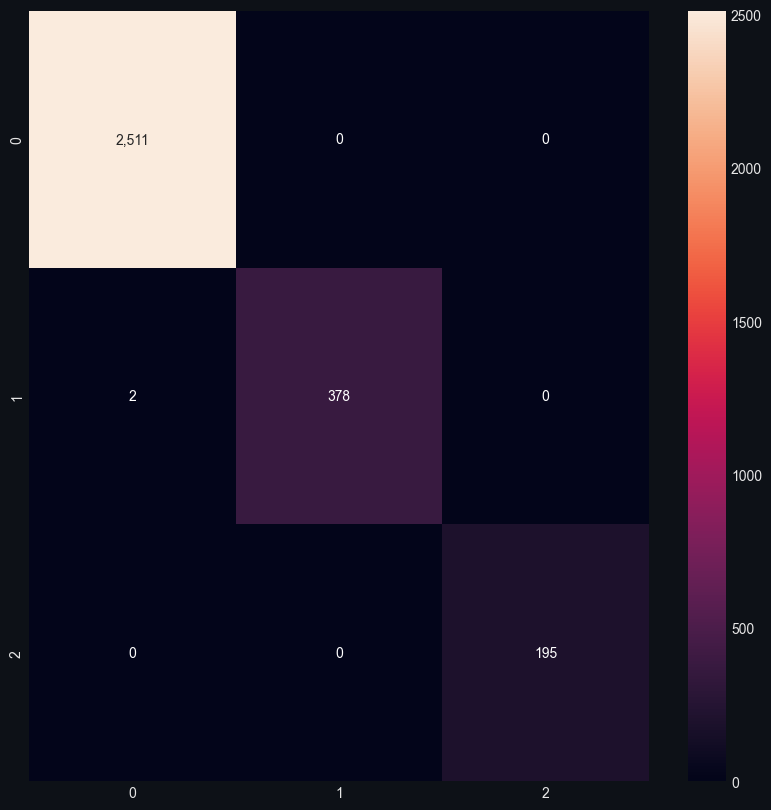

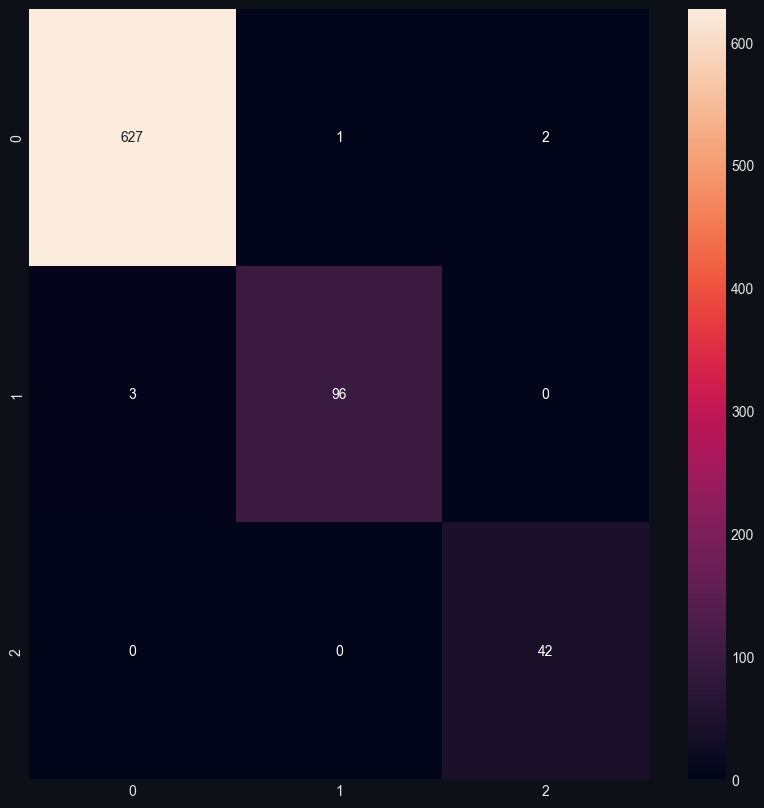

In [3]:
model_name = 'game_state_cake_layer_1_v1'
training_root = r'O:\eve_models\training_data\game_state_cake_layer_1_v1'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':False
}

stats, rendering = build_and_train(**params)
print(stats['eval_results'])
render_cm(stats, 'train_cm')
render_cm(stats, 'val_cm')
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [16]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    r'O:\eve_models\training_data\game_state_cake_layer_1_v1',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(216, 384),
    batch_size=1)

Found 3859 files belonging to 3 classes.
Using 3088 files for training.


In [17]:
model = tf.keras.models.load_model(r"O:\eve_models\training_data\game_state_cake_layer_1_v1\game_state_cake_layer_1_v1_model.h5")

In [24]:
import numpy as np
train_data = list(train_ds)
features = np.concatenate([train_data[n][0] for n in range(0, len(train_data))])
targets = np.concatenate([train_data[n][1] for n in range(0, len(train_data))])

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: O:\eve_models\training_data\game_state_cake_layer_1_v1\sub_app\2088a6cf-e1e2-11ed-b06a-2cf05d9fe8eb.png : The system cannot find the file specified.
; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

In [ ]:
classes = [
  "in_flight",
  "in_hanger",
  "sub_app"
 ]

In [ ]:
results = model.predict(features)

In [ ]:
for i, result in enumerate(results):
    if np.argmax(result) != targets[i]:
        print(f"Index:{i} Predicted:{classes[np.argmax(result)]} Truth:{classes[targets[i]]}")

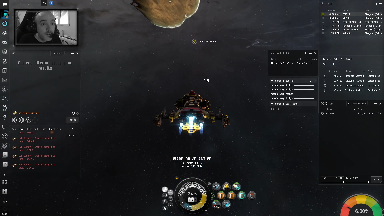

In [23]:
from PIL import Image
Image.fromarray(features[2698].astype('uint8'))

In [56]:
classes[targets[63]]

'in_flight'

23
Found 24 files belonging to 3 classes.
Using 20 files for training.
Found 24 files belonging to 3 classes.
Using 4 files for validation.
Class Names: ['char_select', 'connection_lost', 'docking']
Class Weights: {0: 2.2222222222222223, 1: 0.8333333333333334, 2: 0.7407407407407407}
Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 5.7093 - accuracy: 0.6500 - val_loss: 1.0645 - val_accuracy: 0.7500
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.7364 - accuracy: 0.6500 - val_loss: 0.3613 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.1881 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/10
20/2

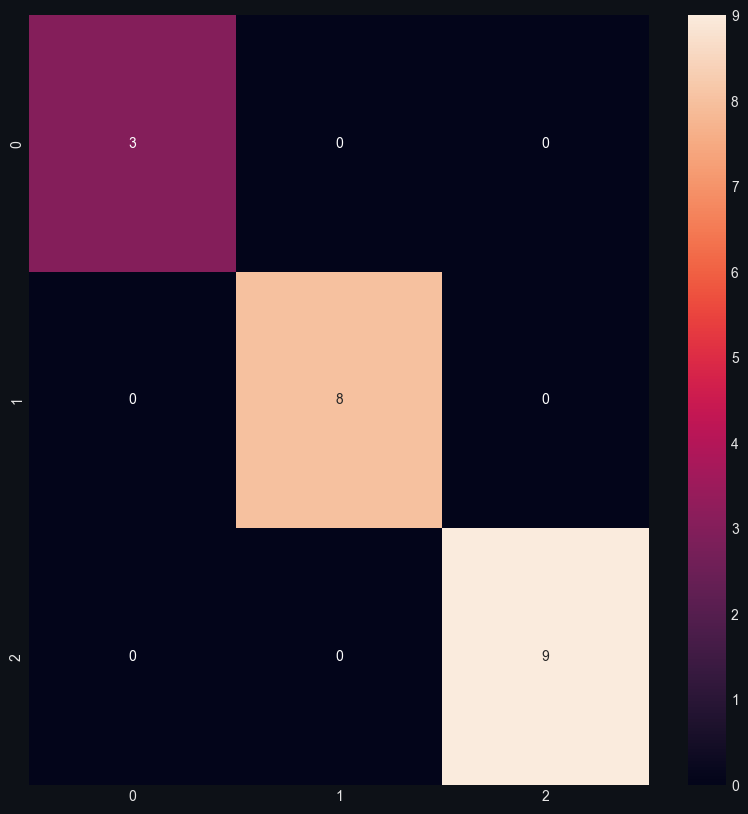

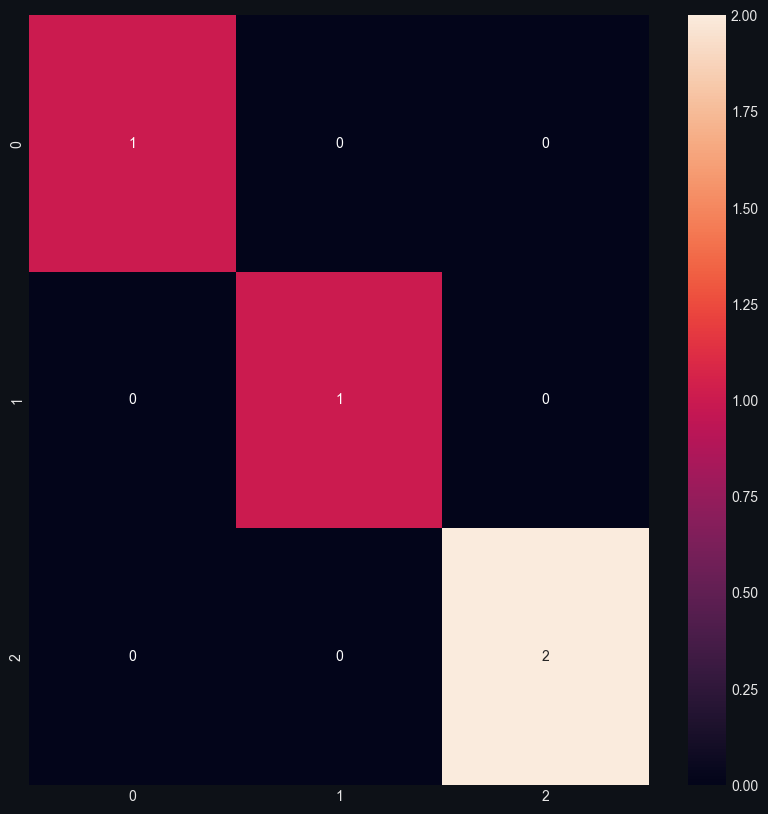

In [4]:
model_name = 'game_state_cake_layer_2_v1'
training_root = r'O:\eve_models\training_data\game_state_cake_layer_2_v1'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':True
}

stats, rendering = build_and_train(**params)
print(stats['eval_results'])
render_cm(stats, 'train_cm')
render_cm(stats, 'val_cm')
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

4078
Found 4078 files belonging to 4 classes.
Using 3263 files for training.
Found 4078 files belonging to 4 classes.
Using 815 files for validation.
Class Names: ['in_flight', 'in_hanger', 'invalid', 'sub_app']
Class Weights: {0: 0.3276104417670683, 1: 2.22275204359673, 2: 3.7941860465116277, 3: 4.270942408376963}
Epoch 1/10
3263/3263 [==============================] - 18s 5ms/step - loss: 0.6688 - accuracy: 0.7846 - val_loss: 0.6273 - val_accuracy: 0.8233
Epoch 2/10
3263/3263 [==============================] - 14s 4ms/step - loss: 0.1756 - accuracy: 0.9458 - val_loss: 0.0413 - val_accuracy: 0.9902
Epoch 3/10
3263/3263 [==============================] - 14s 4ms/step - loss: 0.0947 - accuracy: 0.9758 - val_loss: 0.0265 - val_accuracy: 0.9939
Epoch 4/10
3263/3263 [==============================] - 14s 4ms/step - loss: 0.0664 - accuracy: 0.9776 - val_loss: 0.0589 - val_accuracy: 0.9890
Epoch 5/10
3263/3263 [==============================] - 14s 4ms/step - loss: 0.1424 - accuracy: 0.9681 

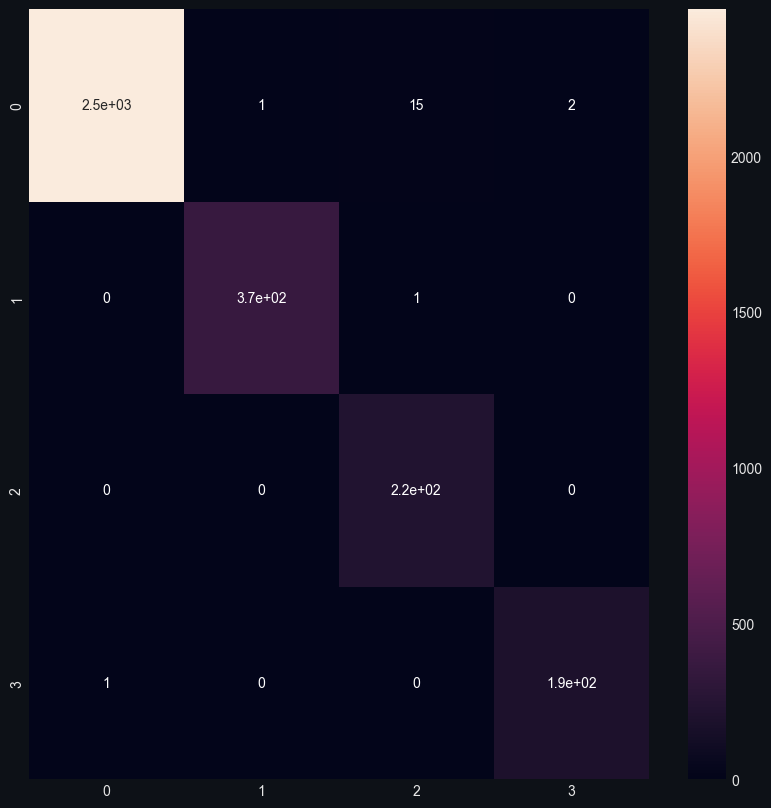

In [4]:
model_name = 'game_state'
training_root = r'O:\eve_models\training_data\game_state'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':True
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

#save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
#save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

35723
Found 35723 files belonging to 528 classes.
Using 28579 files for training.
Found 35723 files belonging to 528 classes.
Using 7144 files for validation.
['100_200', '100_210', '100_220', '100_250', '100_260', '100_270', '100_290', '100_310', '100_320', '100_330', '100_340', '100_350', '100_360', '100_370', '100_380', '100_390', '100_400', '100_410', '100_420', '100_430', '100_440', '100_460', '100_470', '100_480', '100_490', '110_200', '110_210', '110_220', '110_250', '110_260', '110_270', '110_290', '110_310', '110_320', '110_330', '110_340', '110_350', '110_360', '110_370', '110_380', '110_390', '110_400', '110_410', '110_420', '110_430', '110_440', '110_460', '110_470', '110_480', '110_490', '120_200', '120_210', '120_220', '120_250', '120_260', '120_270', '120_290', '120_310', '120_320', '120_330', '120_340', '120_350', '120_360', '120_370', '120_380', '120_390', '120_400', '120_410', '120_420', '120_430', '120_440', '120_460', '120_470', '120_480', '120_490', '130_100', '130

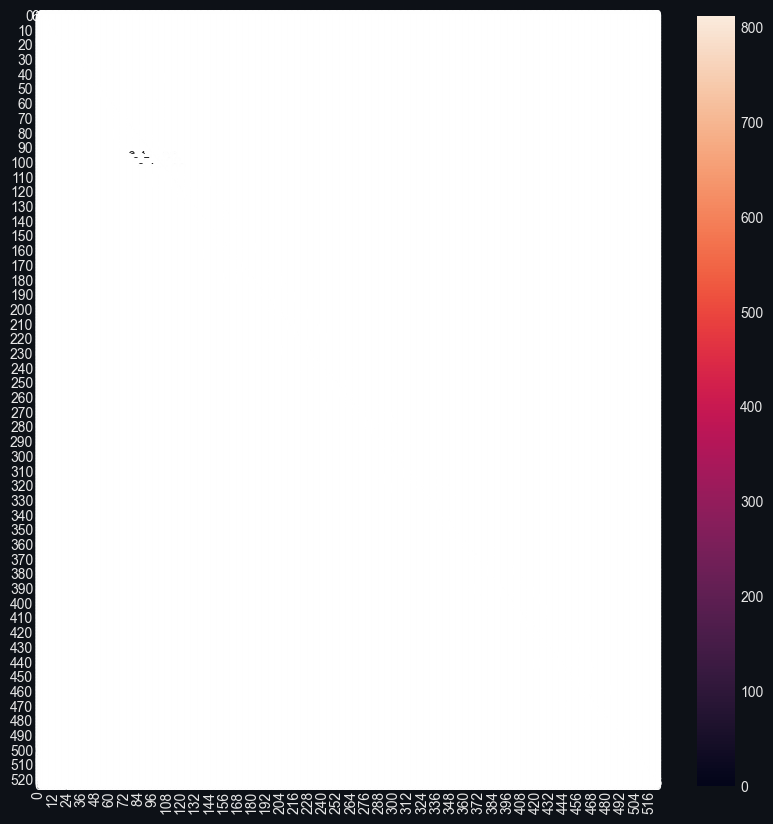

In [3]:
model_name = 'route_y_large_vert_class_v4'
training_root = r'O:\eve_models\training_data\route_y_large_vert_class_v4'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs':10, 
    'resize_ratio':0.2
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

#save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
#save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [4]:

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

55
Found 55 files belonging to 3 classes.
Using 44 files for training.
Found 55 files belonging to 3 classes.
Using 11 files for validation.
['second_pos', 'seventh_pos', 'third_pos']
Epoch 1/10
44/44 [==============================] - 5s 10ms/step - loss: 0.9462 - accuracy: 0.5227 - val_loss: 0.4277 - val_accuracy: 0.9091
Epoch 2/10
44/44 [==============================] - 0s 7ms/step - loss: 0.6434 - accuracy: 0.8864 - val_loss: 0.2687 - val_accuracy: 1.0000
Epoch 3/10
44/44 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9091 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0673 - accuracy: 0.9545 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9773 - val_loss: 9.8307e-04 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 4

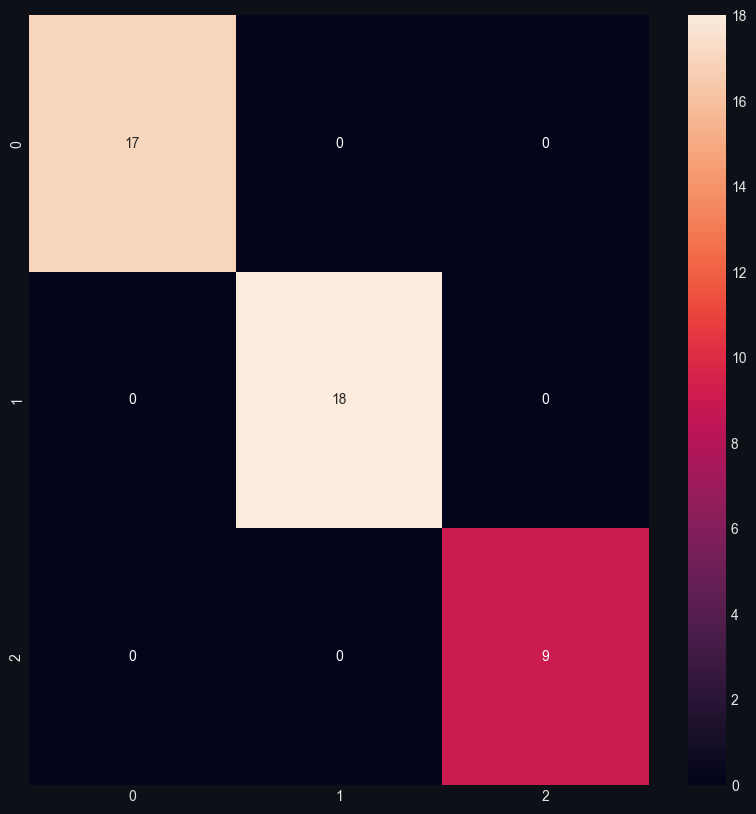

In [5]:
model_name = 'set_dest'
training_root = r'O:\eve_models\training_data\set_dest'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

6
Found 6 files belonging to 2 classes.
Using 5 files for training.
Found 6 files belonging to 2 classes.
Using 1 files for validation.
['empty', 'set_quant']
Epoch 1/10
5/5 [==============================] - 0s 39ms/step - loss: 2.9192 - accuracy: 0.4000 - val_loss: 3.5744 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 0.3028 - accuracy: 0.8000 - val_loss: 0.7954 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 1.0750 - accuracy: 0.4000 - val_loss: 0.6318 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 0.5748 - accuracy: 0.8000 - val_loss: 0.6396 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.5900 - accuracy: 1.0000 - val_loss: 0.6205 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 0.5986 - accuracy: 0.8000 - val_loss: 0.6088 - val_accuracy: 1.0000

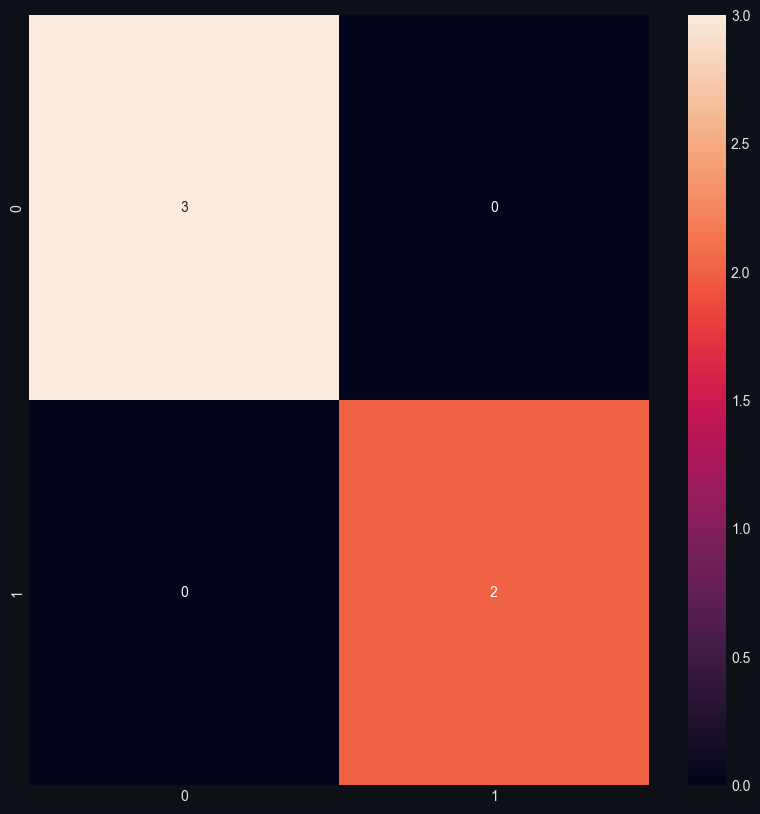

In [29]:
model_name = 'hanger_menus'
training_root = r'O:\eve_models\training_data\hanger_menus'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

351
Found 351 files belonging to 7 classes.
Using 281 files for training.
Found 351 files belonging to 7 classes.
Using 70 files for validation.
['dock_now', 'invalid', 'jump_though_first', 'jump_through_second', 'no_action', 'warp_to_dock_3', 'warp_to_dock_4']
Epoch 1/10
281/281 [==============================] - 2s 4ms/step - loss: 1.1879 - accuracy: 0.6014 - val_loss: 0.3233 - val_accuracy: 0.9714
Epoch 2/10
281/281 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.9039 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 3/10
281/281 [==============================] - 1s 4ms/step - loss: 0.2059 - accuracy: 0.9537 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 4/10
281/281 [==============================] - 1s 4ms/step - loss: 0.0907 - accuracy: 0.9786 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 5/10
281/281 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9715 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6/10
281/281 [========

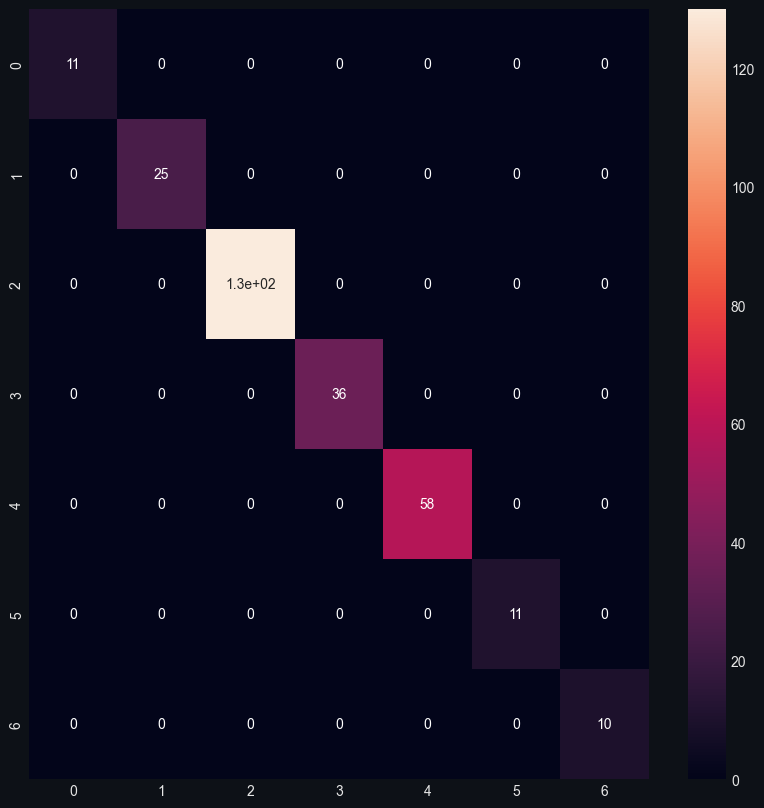

In [8]:
model_name = 'nav_options'
training_root = r'O:\eve_models\training_data\nav_options'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

492
Found 492 files belonging to 5 classes.
Using 394 files for training.
Found 492 files belonging to 5 classes.
Using 98 files for validation.
['both_running', 'invalid', 'miner_1_running', 'miner_2_running', 'no_miners_running']
Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 1.3734 - accuracy: 0.5051 - val_loss: 1.3083 - val_accuracy: 0.5000
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.7301 - accuracy: 0.7310 - val_loss: 0.3154 - val_accuracy: 0.7959
Epoch 3/10
394/394 [==============================] - 2s 4ms/step - loss: 0.1886 - accuracy: 0.9365 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 4/10
394/394 [==============================] - 1s 4ms/step - loss: 0.1389 - accuracy: 0.9416 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9822 - val_loss: 1.5768e-04 - val_accuracy: 1.0000
Epoch 6/10
394/394 [==============================] - 

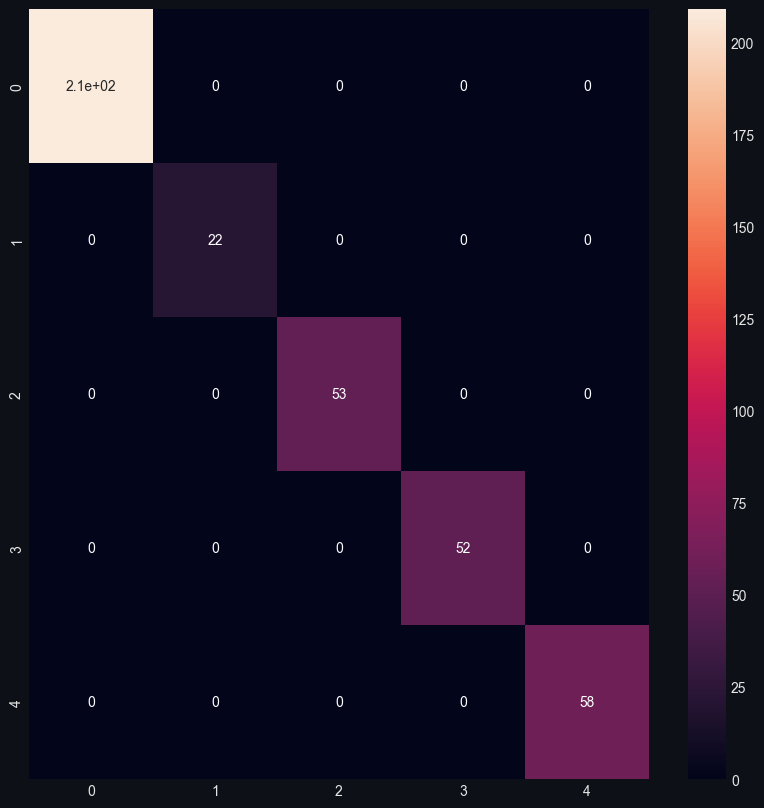

In [31]:
model_name = 'mining_tool_state'
training_root = r'O:\eve_models\training_data\mining_tool_state'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')